In [85]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df=pd.read_csv(r"D:\Modular_programming\notebook\data\insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [87]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [88]:
print("Total Records :{} \nTotal Features : {}".format(df.shape[0],df.shape[1]))

Total Records :1338 
Total Features : 7


In [89]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [91]:
df.drop_duplicates(inplace=True)



In [92]:
df.reset_index(drop=True,inplace=True)

<Axes: >

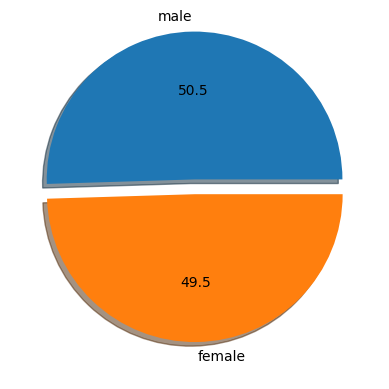

In [93]:
df.sex.value_counts().plot.pie(y=df["sex"],autopct="%1.1f",explode=[0.1,0],shadow=True)

In [94]:
numerical_columns=df.select_dtypes(exclude="object").columns.to_list()
categorical_columns=df.select_dtypes(include="object").columns.to_list()
print("All features :{}\nNumerical columns : {}\nCategorical Columns: {}".format(df.columns.tolist(),numerical_columns,categorical_columns))


All features :['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Numerical columns : ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']


In [95]:
region_wise_value_per=df["region"].value_counts(normalize=True)*100
region_wise_value_per=region_wise_value_per.to_frame(name="count")
region_wise_value_per

,count
region,
southeast,27.225131
southwest,24.308153
northwest,24.233358
northeast,24.233358


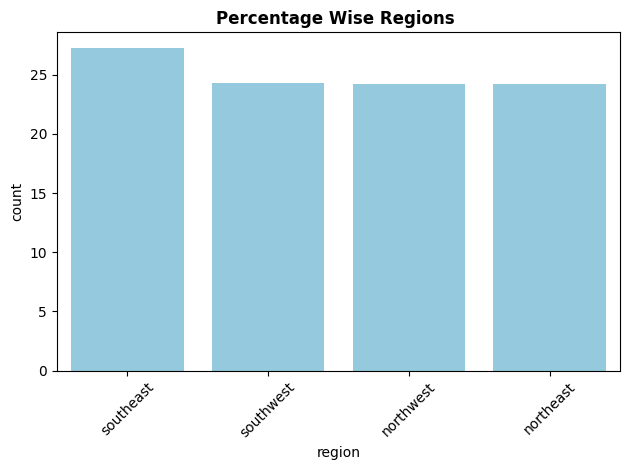

In [96]:
sns.barplot(x="region",y="count",data=region_wise_value_per,color="skyblue")
plt.title("Percentage Wise Regions ",fontweight="bold",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

In [97]:
for i in range(len(numerical_columns)):
    print(numerical_columns[i])
    print("="*35)
    print(df[numerical_columns[i]].unique())

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505
 22.04  35

In [98]:
for j in range(len(categorical_columns)):
    print(categorical_columns[j])
    print("="*35)
    print(df[categorical_columns[j]].unique())

sex
<StringArray>
['female', 'male']
Length: 2, dtype: str
smoker
<StringArray>
['yes', 'no']
Length: 2, dtype: str
region
<StringArray>
['southwest', 'southeast', 'northwest', 'northeast']
Length: 4, dtype: str


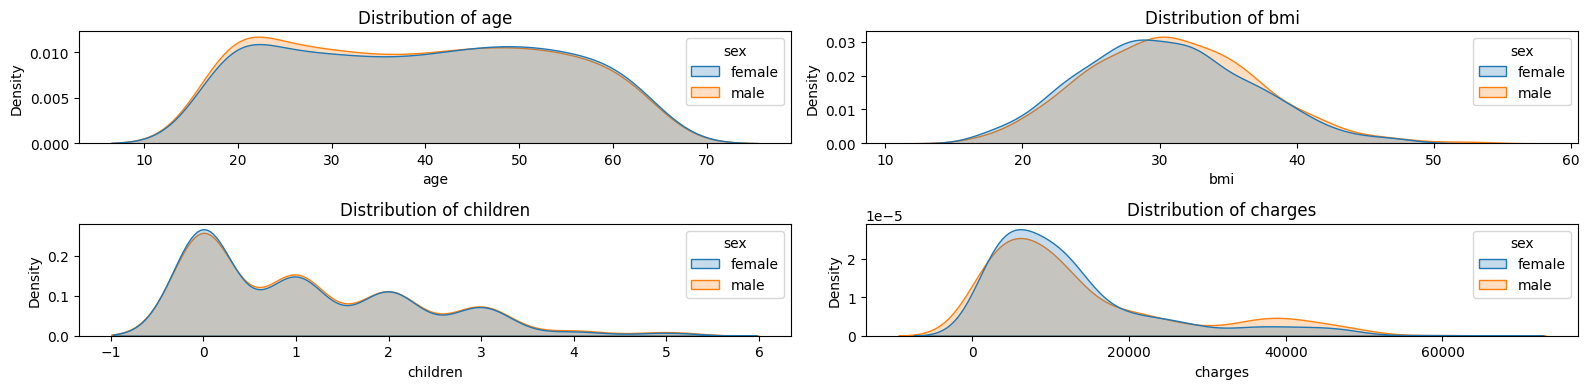

In [99]:
plt.figure(figsize=(16,4))
for i in range (len(numerical_columns)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=numerical_columns[i], hue="sex",fill=True, color="purple", data=df)
    plt.title(f"Distribution of {numerical_columns[i]}")
    plt.tight_layout()
    


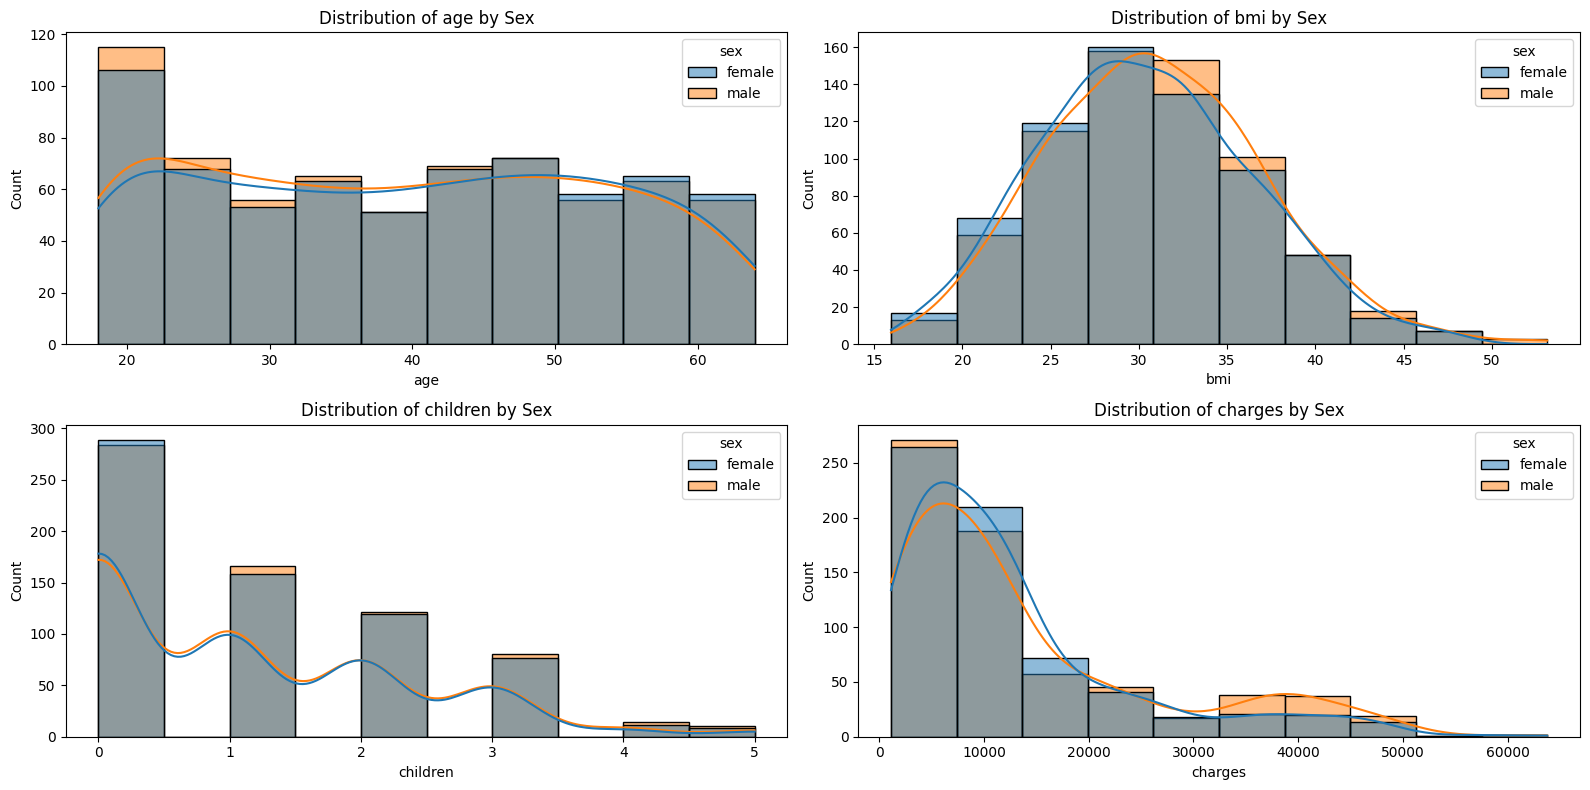

In [100]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=col, hue="sex", fill=True, data=df,bins=10,kde=True)
    plt.title(f"Distribution of {col} by Sex")

plt.tight_layout()
plt.show()


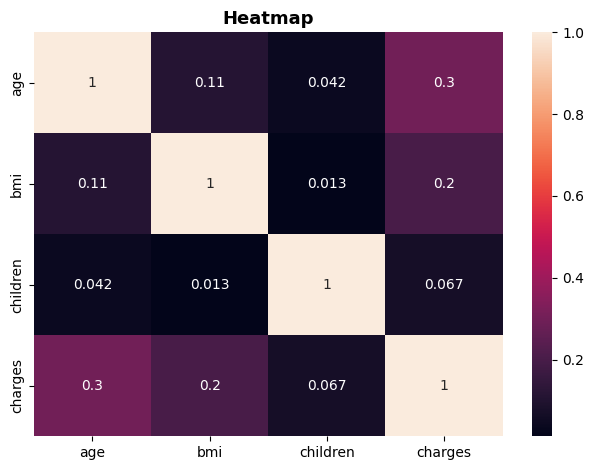

In [101]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title("Heatmap",fontweight="bold",color="black",fontsize=13)
plt.tight_layout()

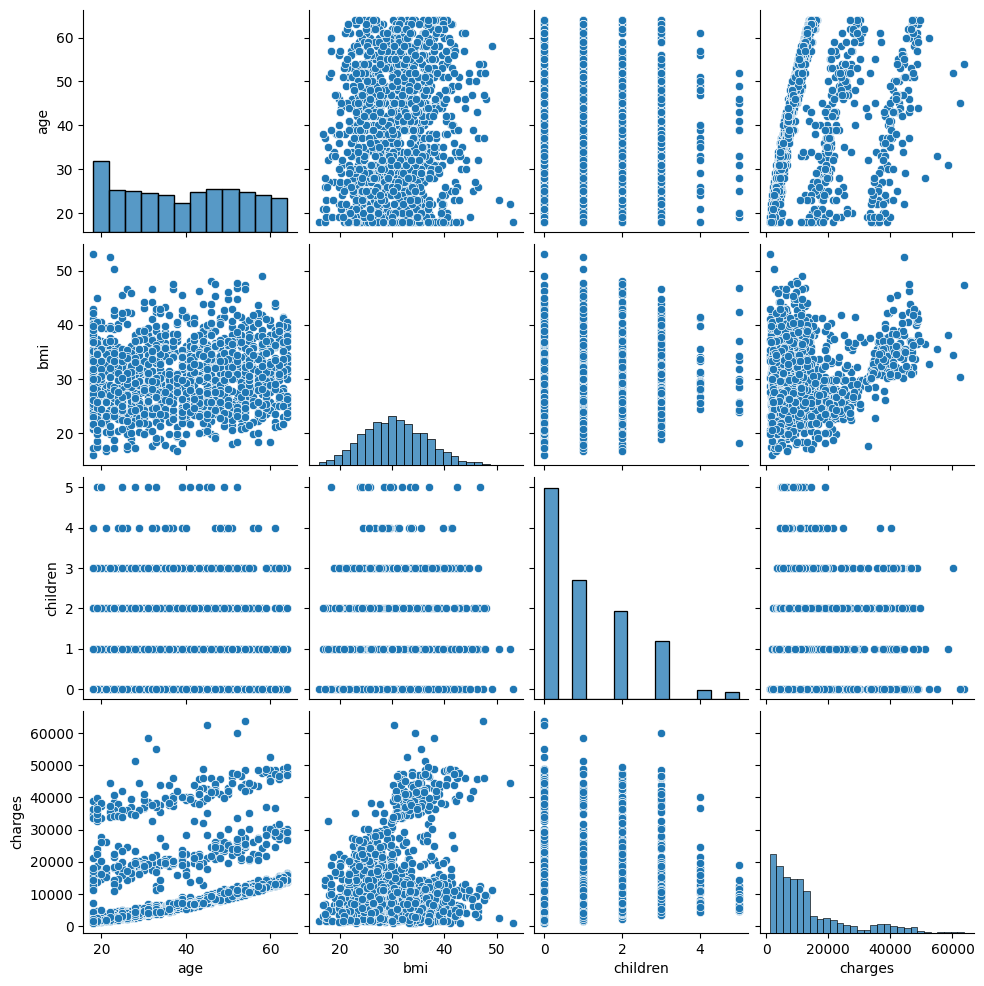

In [102]:
sns.pairplot(df)

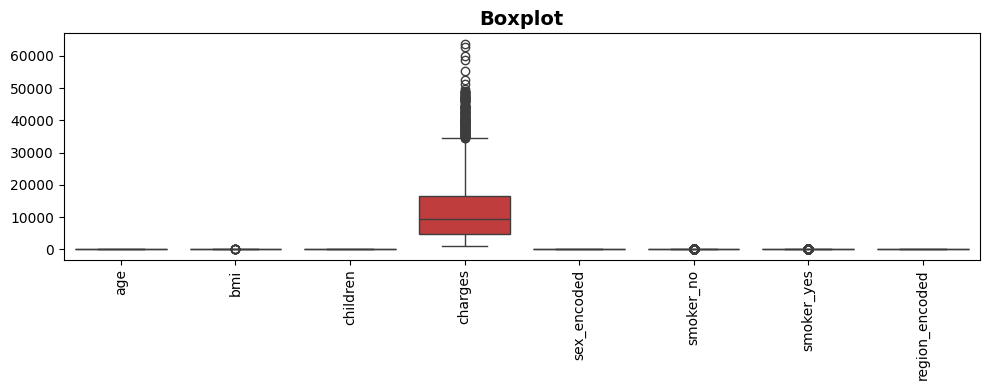

In [119]:
plt.figure(figsize=(10,4))
sns.boxplot(df)
plt.title("Boxplot",fontweight="bold",fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

In [104]:
df.sample(2)

,age,sex,bmi,children,smoker,region,charges
788,62,female,29.92,0,no,southeast,13457.9608
391,19,female,37.43,0,no,northwest,2138.0707


In [105]:
encoder=LabelEncoder()

encoded=encoder.fit_transform(df["sex"])
sex_encoded_df=pd.DataFrame(encoded,columns=["sex_encoded"])
df=pd.concat([df,sex_encoded_df],axis=1)

In [106]:
onehotencoder=OneHotEncoder()
encoded=onehotencoder.fit_transform(df[["smoker"]]).toarray()
smoker_encoded_df=pd.DataFrame(encoded,columns=onehotencoder.get_feature_names_out())
df=pd.concat([df,smoker_encoded_df],axis=1)


In [107]:
df["region_encoded"]=df["region"].replace({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

In [108]:
df=df.drop(columns=["sex","smoker","region"])


In [109]:
df.head()

,age,bmi,children,charges,sex_encoded,smoker_no,smoker_yes,region_encoded
0,19,27.900,0,16884.92400,0,0.0,1.0,0
1,18,33.770,1,1725.55230,1,1.0,0.0,1
2,28,33.000,3,4449.46200,1,1.0,0.0,1
3,33,22.705,0,21984.47061,1,1.0,0.0,2
4,32,28.880,0,3866.85520,1,1.0,0.0,2


In [110]:
#Just checking pipeline of data transformation

import pickle
with open (r"D:\Modular_programming\artifacts\preprocessor.pkl","rb") as file:
    preprocessor=pickle.load(file)
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numerical_pipeline', ...), ('categorical_pipeline', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_nam

###Model Training

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np


In [134]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

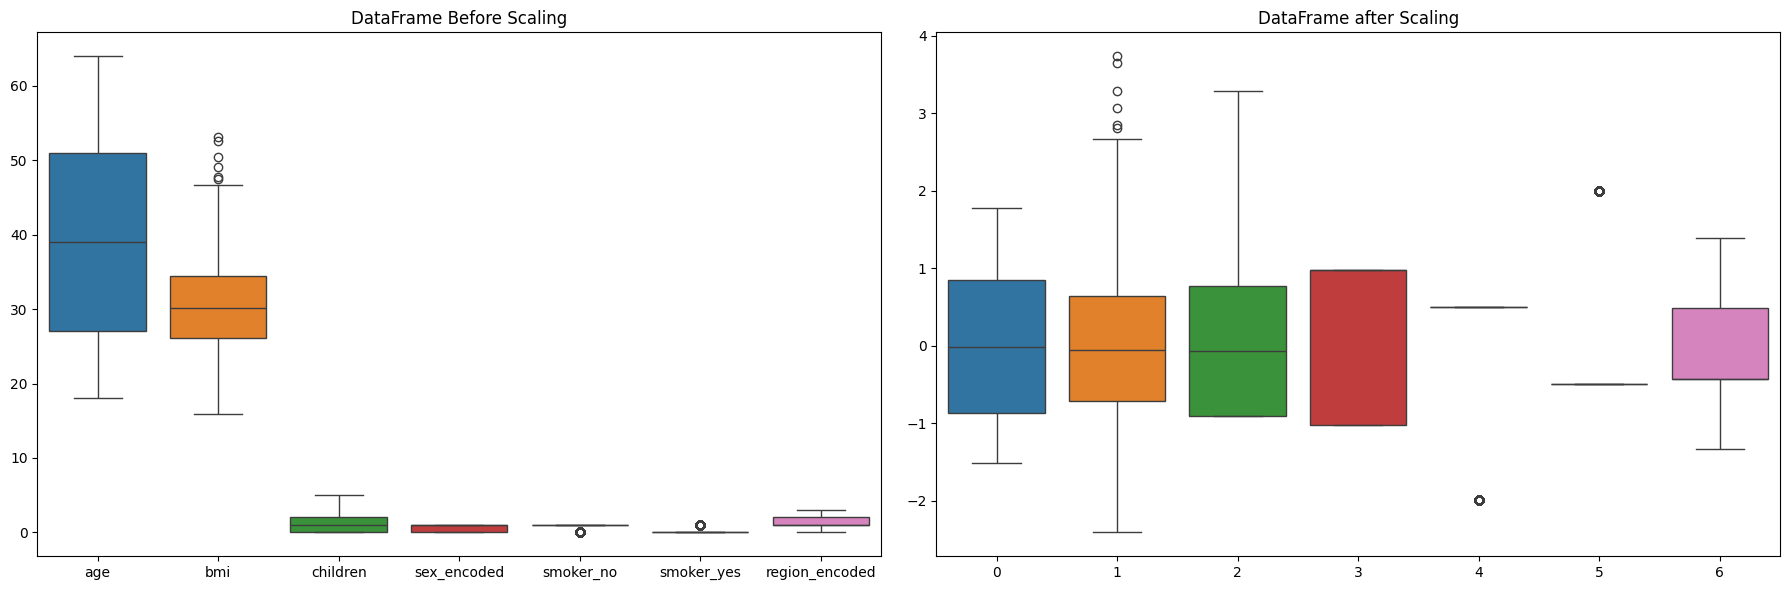

In [136]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

plt.figure(figsize=(18,6))


plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("DataFrame Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("DataFrame after Scaling")
plt.tight_layout()



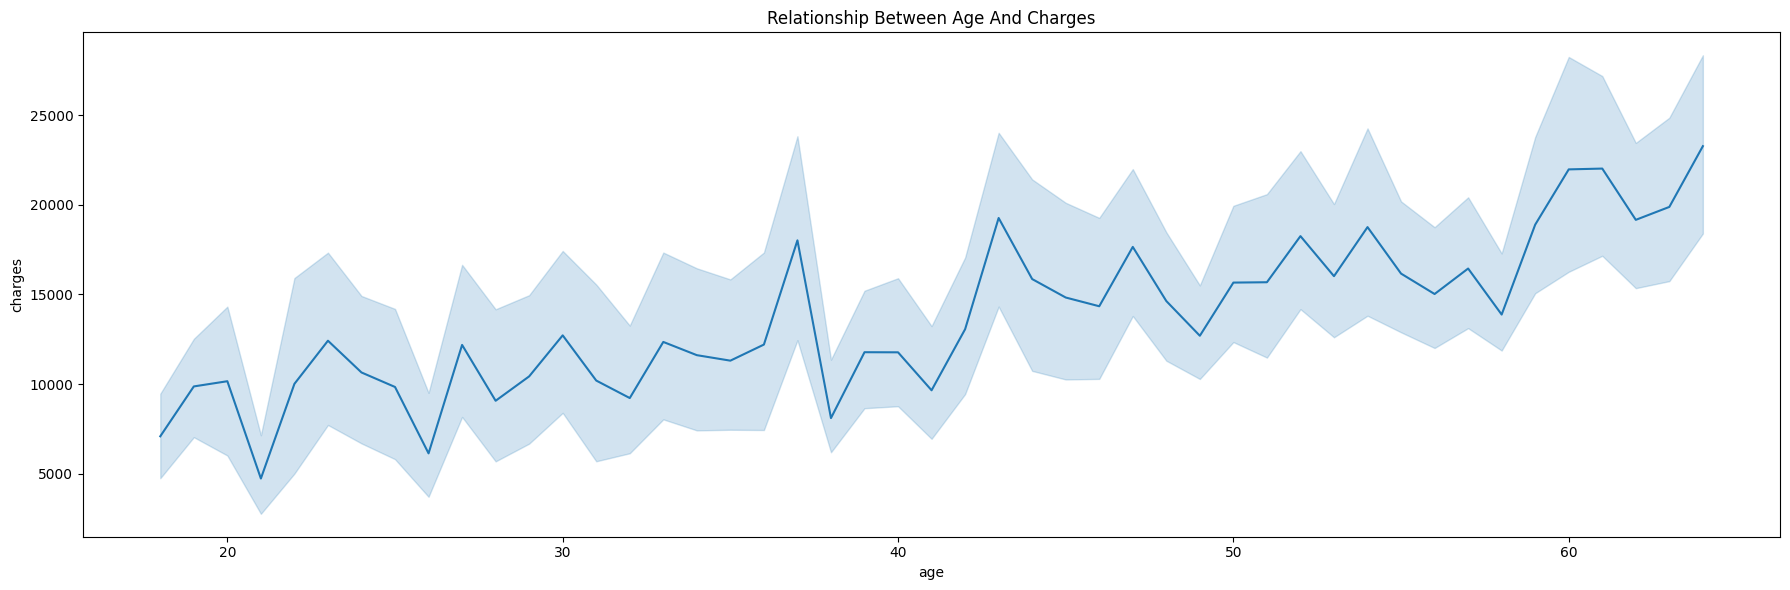

In [137]:

plt.figure(figsize=(18,6))
sns.lineplot(x=df["age"],y=df["charges"],data=df)
plt.title("Relationship Between Age And Charges")
plt.tight_layout()



In [138]:
models={"LinearRegression":LinearRegression(),"Lasso":Lasso(),"ridge":Ridge(),"ElasticNet":ElasticNet(),"SVR":SVR(),
        "KNN":KNeighborsRegressor(),"AdaBoostRegressor":AdaBoostRegressor(),"GradientBoostingRegressor":GradientBoostingRegressor(),
        "Xgboost":XGBRegressor(),"DecisionTree":DecisionTreeRegressor()}

In [140]:
def evalution_metrics(true,predicted):
    R2_score=r2_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(true,predicted)
    return R2_score,mse,rmse,mae


In [142]:
model_name=[]
error_train=[]
error_test=[]
r2_train=[]
r2_test=[]
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_train_pred=model.predict(X_train_scaled)
    y_test_pred=model.predict(X_test_scaled)
    train_metrics=evalution_metrics(y_train,y_train_pred)
    test_metrics=evalution_metrics(y_test,y_test_pred)

    model_name.append(name)
    error_train.append(train_metrics[3])
    error_test.append(test_metrics[3])
    r2_train.append(train_metrics[0])
    r2_test.append(test_metrics[0])
    
    print(name.center(50))
    print("-------------------------------\n".center(50))
    print("Performance metrics on train set\n")
    print("Training R2 Score   :",train_metrics[0])
    print("Training MSE        :",train_metrics[1])
    print("Traing RMSE         :",train_metrics[2])
    print("Training MAE        :",train_metrics[3])
    

    print("-------------------------------\n")
    print("Performance metrics on test set\n")
    print("Testing R2 Score   :",test_metrics[0])
    print("Testing MSE        :",test_metrics[1])
    print("Testing RMSE       :",test_metrics[2])
    print("Testing MAE        :",test_metrics[3])
    print("="*50)


                 LinearRegression                 
         -------------------------------
         
Performance metrics on train set

Training R2 Score   : 0.7297182858804965
Training MSE        : 37005531.72811554
Traing RMSE         : 6083.217218554302
Training MAE        : 4181.321578104917
-------------------------------

Performance metrics on test set

Testing R2 Score   : 0.8068466322629113
Testing MSE        : 35493102.6116505
Testing RMSE       : 5957.608799816458
Testing MAE        : 4182.353155288296
                      Lasso                       
         -------------------------------
         
Performance metrics on train set

Training R2 Score   : 0.7297182396882604
Training MSE        : 37005538.05251032
Traing RMSE         : 6083.2177383774715
Training MAE        : 4181.230916118352
-------------------------------

Performance metrics on test set

Testing R2 Score   : 0.8068112153562181
Testing MSE        : 35499610.683024935
Testing RMSE       : 5958.15497306212

In [151]:
model_metrics_df=pd.DataFrame(zip(model_name,r2_train,r2_test,error_train,error_test),columns=["model_name","r2_train","r2_test","error_train","error_test"]).sort_values(by="r2_test",ascending=False).reset_index(drop=True)

In [153]:
model_metrics_df

,model_name,r2_train,r2_test,error_train,error_test
0,GradientBoostingRegressor,0.893170,0.898900,2092.692509,2551.323156
1,Xgboost,0.996708,0.868011,406.036565,2840.771102
2,KNN,0.858599,0.864530,2642.196895,3102.394693
3,AdaBoostRegressor,0.822378,0.859510,3900.074546,4143.764629
4,LinearRegression,0.729718,0.806847,4181.321578,4182.353155
5,Lasso,0.729718,0.806811,4181.230916,4182.463819
6,ridge,0.729718,0.806738,4181.655767,4183.475191
7,DecisionTree,1.000000,0.760317,0.000000,3095.132677
8,ElasticNet,0.691455,0.730373,4697.823918,5000.325931
9,SVR,-0.093872,-0.127377,8066.632395,9242.732871


Text(0.5, 0.98, 'Model Performance Comparison (Medical Insurance Cost Prediction)')

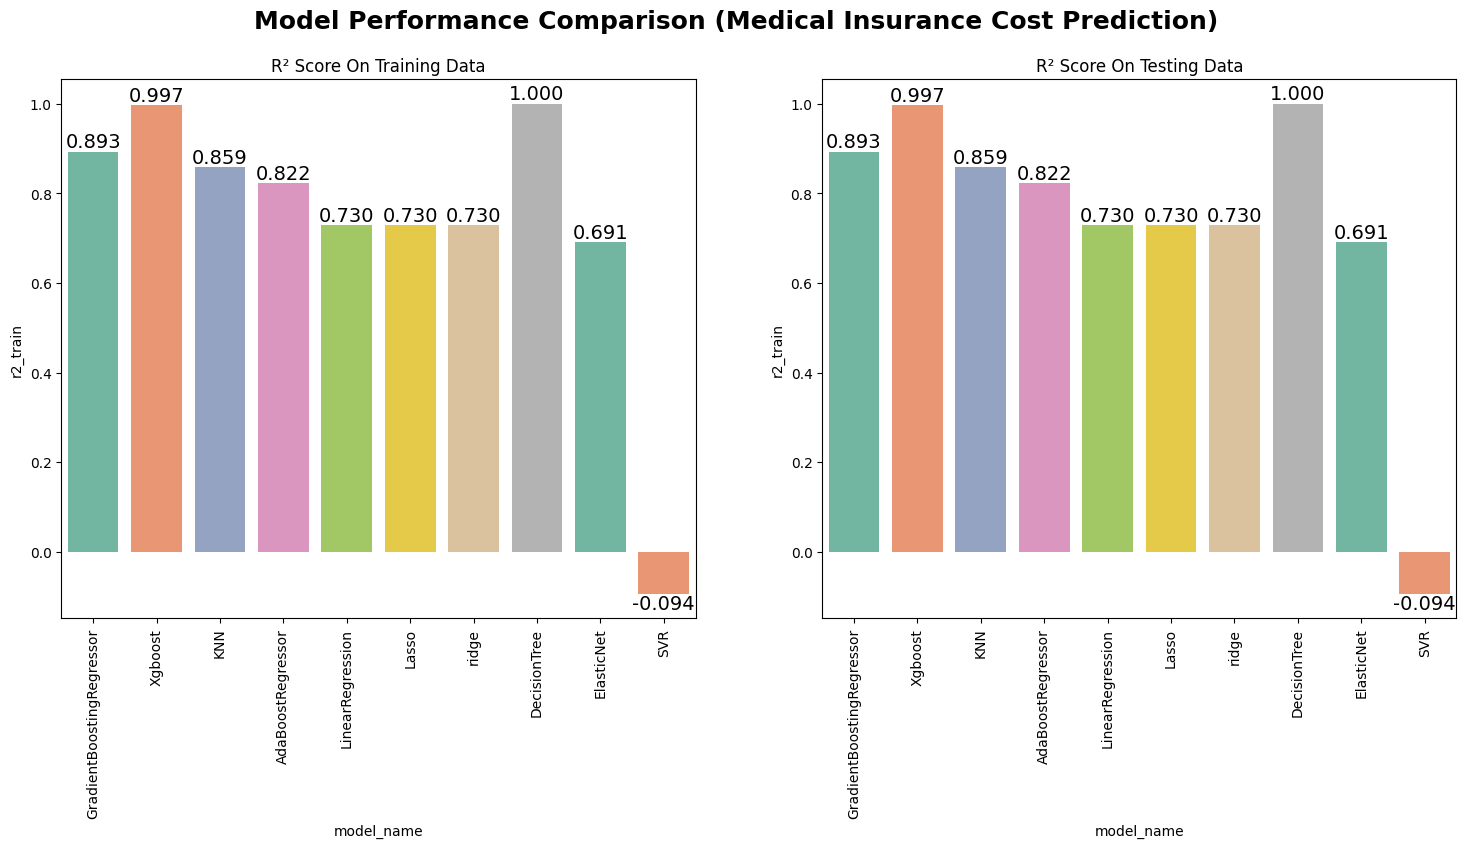

In [163]:
fig,ax=plt.subplots(1,2,figsize=(18,7))
Types_of_datasets=["Training","Testing"]
ax=ax.ravel()
for i in range(len(ax)):
    sns.barplot(x="model_name",y="r2_train",data=model_metrics_df,ax=ax[i],palette="Set2")
    ax[i].set_title(f"R² Score On {Types_of_datasets[i]} Data")
    for container in ax[i].containers:
        ax[i].bar_label(container,color="black",fmt="%.3f",fontsize=14)
        ax[i].tick_params(axis="x",rotation=90)
plt.suptitle(
    "Model Performance Comparison (Medical Insurance Cost Prediction)",
    fontsize=18,
    fontweight="bold")

In [175]:
with open(r"D:\Modular_programming\artifacts\model.pkl","rb") as file:
    model_file=pickle.load(file)
model_file

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [21]:
import pandas as pd
from dataclasses import dataclass
@dataclass
class UserData:
    
        age:int
        sex:str
        bmi:float
        children:int
        smoker:str
        region:str
        def create_data_frame(self):

            data={"age":self.age,"sex":self.sex,"bmi":self.bmi,"children":self.children,"smoker":self.smoker,"region":self.region}

            return pd.DataFrame([data])


In [22]:
user_obj=UserData(age=23,sex="male",bmi=22.3,children=2,smoker="yes",region="northwwest")

dataframe=user_obj.create_data_frame()
dataframe

,age,sex,bmi,children,smoker,region
0,23,male,22.3,2,yes,northwwest
